In [119]:
X

array([[ 0.        ],
       [ 1.11111111],
       [ 2.22222222],
       [ 3.33333333],
       [ 4.44444444],
       [ 5.55555556],
       [ 6.66666667],
       [ 7.77777778],
       [ 8.88888889],
       [10.        ]])

In [128]:
N = 10
addednoise = np.random.randn(N,1)*0.1

In [185]:
import numpy as np
import GPy

X = np.linspace(0,10,N)[:,None]
X[::3,:]=5

y = np.cos(X)+addednoise


Xtest = np.linspace(0.5,9.5,N)[:,None]
ytest = np.cos(Xtest)+np.random.randn(N,1)*0.1


In [186]:
np.var(addednoise)

0.003963852280176434

In [187]:
m = GPy.models.GPRegression(X,y)
#m.Gaussian_noise.fix(0.01)
#m.Gaussian_noise = 0.1
m.optimize()

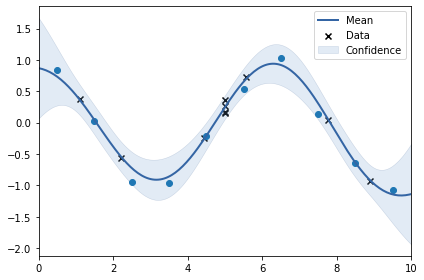

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(plot_limits=[0,10])
plt.scatter(Xtest[:,0],ytest[:,0])

In [189]:
m.Gaussian_noise

Gaussian_noise.,value,constraints,priors
variance,0.007711613426057971,+ve,


In [190]:
#m.log_likelihood()

In [191]:
from scipy.stats import norm
predmeans,predvars = m.predict(Xtest)
np.sum(-np.log(norm(predmeans, np.sqrt(predvars)).pdf(ytest)))

-6.643010887968196

# Future weeks... integrating out our hyperparameters...

array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02])

In [110]:
Xtest = np.linspace(0,10,30)[:,None]
ytest = np.cos(Xtest)+np.random.randn(30,1)*0.1
#m = GPy.models.GPRegression(X,y)
predy = []
m.optimize()
prob = np.zeros([30,1])
for nv in np.logspace(-5,2,20):
    #for ls in np.arange(0.2,5,0.2):
    #    m.kern.lengthscale = ls
    m.Gaussian_noise = nv
    #print("%6.2f %6.2f" % (ls,m.log_likelihood()))
    predmeans,predvars = m.predict(Xtest)
    prob += norm(predmeans, np.sqrt(predvars)).pdf(ytest)/20
    print("%10.5f, %4.1f" % (nv, np.sum(-np.log(norm(predmeans, np.sqrt(predvars)).pdf(ytest)))))


   0.00001,  inf
   0.00002,  inf
   0.00005,  inf
   0.00013,  inf
   0.00030,  inf
   0.00070,  inf
   0.00162, 4497.8
   0.00379, 1899.1
   0.00886, 793.7
   0.02069, 327.8
   0.04833, 135.6
   0.11288, 60.5
   0.26367, 35.7
   0.61585, 32.3
   1.43845, 38.2
   3.35982, 48.0
   7.84760, 59.4
  18.32981, 71.6
  42.81332, 84.1
 100.00000, 96.7


 <ipython-input-110-490970f2883d>:14: RuntimeWarning:divide by zero encountered in log


In [111]:
prob

array([[0.05145727],
       [0.0630673 ],
       [0.08315908],
       [0.11206044],
       [0.15945096],
       [2.63817495],
       [0.12724431],
       [0.07570526],
       [0.07364697],
       [0.05983978],
       [0.07880086],
       [0.06022879],
       [0.1005925 ],
       [0.2415426 ],
       [0.22629756],
       [0.22353097],
       [0.0889319 ],
       [0.05367938],
       [0.05638724],
       [0.05887575],
       [0.07251779],
       [0.13027771],
       [0.19649815],
       [0.52696008],
       [0.1488456 ],
       [0.08270486],
       [0.06577371],
       [0.05857281],
       [0.05587224],
       [0.07143811]])

In [40]:
from scipy.stats import norm
norm(predmeans, np.sqrt(predvars)).pdf(ytest)

array([[2.89371689e-03],
       [4.67082024e+00],
       [4.36067077e-04],
       [1.12737645e-03],
       [5.87201195e-03],
       [2.85581295e-03],
       [5.00055605e+00],
       [2.90495495e-01],
       [5.47670504e-05],
       [8.11931962e-05],
       [1.99146333e-05],
       [8.31327493e-02],
       [3.89010029e-02],
       [6.92865252e-01],
       [2.57675796e+00],
       [4.08738102e+00],
       [4.37510869e-04],
       [7.34586702e-03],
       [3.60131007e-11],
       [2.50398545e-10],
       [2.38633511e+00],
       [3.75031445e+00],
       [3.60639118e-01],
       [1.92654166e-06],
       [8.07668615e-04],
       [8.31291459e-11],
       [4.21112078e-07],
       [5.88311981e-01],
       [9.30419369e-01],
       [1.12058919e-09]])

In [37]:
predmeans, predvars = m.predict(Xtest)

In [27]:
m.log_likelihood()

4.396871088174567